In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic time series data for temperature readings
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', end='2021-12-31', freq='D')
temperature = np.random.normal(loc=20, scale=5, size=len(dates))

# Create a DataFrame from the generated data
data = pd.DataFrame({'Date': dates, 'Temperature': temperature})

# Display the first few rows of the dataset
print("Sample of the dataset:")
print(data.head())

# Preprocessing
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Split the data into training and test sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Print the shapes of training and test sets
print("\nTraining data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Sample of the dataset:
        Date  Temperature
0 2020-01-01    28.820262
1 2020-01-02    22.000786
2 2020-01-03    24.893690
3 2020-01-04    31.204466
4 2020-01-05    29.337790

Training data shape: (584, 1)
Test data shape: (147, 1)


In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# Define model parameters
timesteps = 100
input_dim = 1
output_dim = 1

# Define the model
model = Sequential()

# Adding the first LSTM layer with dropout
model.add(LSTM(units=64, return_sequences=True, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.2))

# Adding a second LSTM layer with dropout
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

# Adding a third LSTM layer with dropout
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=output_dim))

# Print the model summary
print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100, 1)              │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,009 (324.25 KB)

 Trainable params: 83,009 (324.25 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.9994 - val_loss: 1.0076
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 1.0010 - val_loss: 1.0075
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 1.0004 - val_loss: 1.0078
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.9913 - val_loss: 1.0075
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 1.0004 - val_loss: 1.0077
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 1.0061 - val_loss: 1.0076
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 1.0020 - val_loss: 1.0079
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.9999 - val_loss: 1.0077
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.9928 - val_loss: 1.0078
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 1.0055 - val_loss: 1.0076
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.9997 - val_loss: 1.0076
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.9

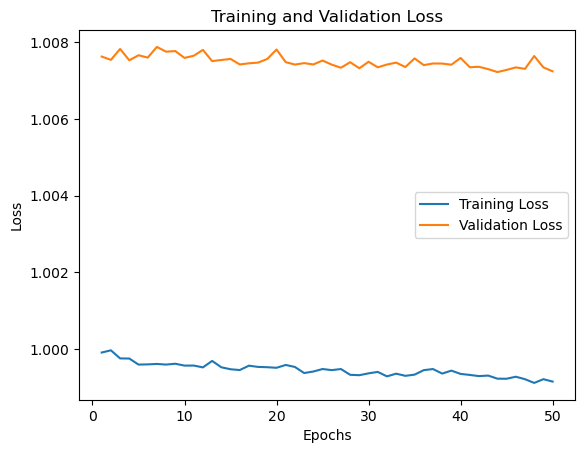

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have your training data X_train and y_train
# and validation data X_val and y_val

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define your LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Monitor training/validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Visualize the training/validation loss
import matplotlib.pyplot as plt

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Mean Absolute Error (MAE): 8.416659922209053
Root Mean Squared Error (RMSE): 10.207949183448664


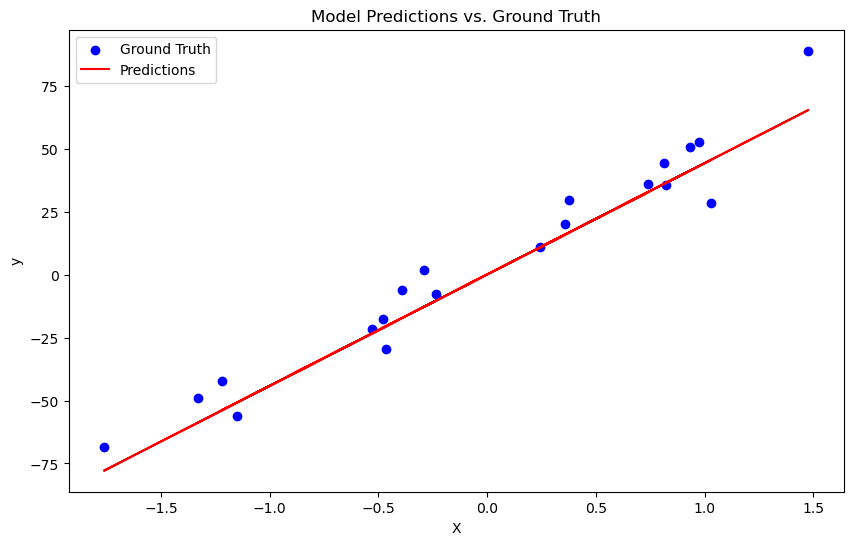

In [5]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize predictions against ground truth
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Ground Truth')
plt.plot(X_test, y_pred, color='red', label='Predictions')
plt.title('Model Predictions vs. Ground Truth')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 20)  # Example input data
y = np.random.randn(100)  # Example target data

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
model = RandomForestRegressor(random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Get the best model
best_model = grid_result.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")


Best: -1.168395 using {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Mean Squared Error on Test Set: 1.0079806010462795
